In [8]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [6]:
# 데이터 준비 1 : colab 제공 mnist 기본 데이터
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv')
mnist_train.shape

(19999, 785)

In [7]:
# 데이터 준비 2 : keras 제공 mnist 기본 데이터
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

5


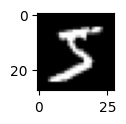

In [13]:
# 데이터 확인
print(y_train[0])
plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [18]:
# 입력 데이터 구조 변경 : 28 X 28 -> 784 (2차원 -> 1차원)
flatten_X_train = X_train.reshape(-1, 28*28)
# print( X_train.shape, flatten_X_train.shape, X_train.dtype, flatten_X_train.dtype, flatten_X_train.max() )
flatten_X_train = flatten_X_train.astype('float32') / 255 # flatten_X_train.max() # 0 ~ 1사이의 데이터로 변환
flatten_X_test = X_test.reshape(-1, 28*28)
flatten_X_test = flatten_X_test.astype('float32') / 255 # flatten_X_test.max() # 0 ~ 1사이의 데이터로 변환

In [19]:
flatten_X_train.min(), flatten_X_train.max()

(0.0, 1.0)

In [22]:
model = tf_keras.Sequential([
    tf_keras.layers.Input(shape=(784, )),
    tf_keras.layers.Dense(512, activation='relu'),
    tf_keras.layers.Dense(256, activation='relu'),
    tf_keras.layers.Dense(10, activation='softmax') # 마지막 레이어의 노드 갯수는 타겟 값 종류의 갯수와 일치하도록 설정
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 학습 방법 설정 ( 최적화 )

In [25]:
model.fit(flatten_X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1895 - accuracy: 0.9433
Epoch 2/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0850 - accuracy: 0.9753
Epoch 3/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0619 - accuracy: 0.9826
